# Download and Process Stories from the Guardian

# Imports and Constants 

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from re import search
import model_helper_functions
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '../data/'

# if the path or names of the data hosted on Kaggle changes the following 
# four constants will need updated
DATA_ARCHIVE = 'guardian-news-dataset.zip'
DATA_FILE = 'combined_filtered.csv'
KAGGLE_DATA_LOCATION = 'sameedhayat/guardian-news-dataset'

CLEAN_DATA_FILE_NAME = 'guardian_news_dataset_cleaned.csv'

SAVE_FILE = False

# Download the Data

In [3]:
try: 
    os.mkdir(DATA_PATH)
except FileExistsError:
    print('Data directory already exists')
    pass

Data directory already exists


In [4]:
# assumes that kaggle has been installed and an api key is correctly installed
if not os.path.exists(DATA_PATH + DATA_ARCHIVE):
    !kaggle datasets download -d $KAGGLE_DATA_LOCATION -p $DATA_PATH

In [5]:
if not os.path.exists(DATA_PATH + DATA_FILE):
    with zipfile.ZipFile(DATA_PATH + DATA_ARCHIVE, 'r') as zip_ref:
        zip_ref.extractall(path=DATA_PATH)

In [6]:
os.listdir(DATA_PATH)

['combined_filtered.csv',
 'fake-and-real-news-dataset.zip',
 'Fake.csv',
 'gist_stopwords.txt',
 'guardian-news-dataset.zip',
 'guardian_news_dataset_cleaned.csv',
 'news_dataset_cleaned.csv',
 'news_dataset_pre_processed.csv',
 'True.csv']

# Load the Data

In [7]:
df = pd.read_csv(DATA_PATH + DATA_FILE)

In [8]:
df.head()

,Unnamed: 0,apiUrl,fields.bodyText,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,filtered_bodyText
0,0,https://content.guardianapis.com/technology/20...,A day after Barack Obama announced tough new s...,technology/2016/dec/31/russia-hacking-malware-...,False,pillar/news,News,technology,Technology,article,2016-12-31T16:34:02Z,US-Russia tensions rise as malware found at Ve...,https://www.theguardian.com/technology/2016/de...,"['day', 'barack', 'obama', 'announced', 'tough..."
1,1,https://content.guardianapis.com/technology/20...,A journalist was temporarily banned from Faceb...,technology/2016/dec/30/facebook-temporary-ban-...,False,pillar/news,News,technology,Technology,article,2016-12-30T21:22:06Z,Facebook temporarily bans author after he call...,https://www.theguardian.com/technology/2016/de...,"['journalist', 'temporarily', 'banned', 'faceb..."
2,2,https://content.guardianapis.com/technology/20...,Technology? Bah humbug: “I think we ought to g...,technology/2016/dec/30/donald-trump-technology...,False,pillar/news,News,technology,Technology,article,2016-12-30T08:30:28Z,Donald Trump is technology's befuddled (but da...,https://www.theguardian.com/technology/2016/de...,"['technology', 'bah', 'humbug', 'think', 'ough..."
3,3,https://content.guardianapis.com/technology/20...,While there were some good things in technolog...,technology/2016/dec/30/detonating-devices-and-...,False,pillar/news,News,technology,Technology,article,2016-12-30T07:00:26Z,Exploding phones and Snapchat clones: the bigg...,https://www.theguardian.com/technology/2016/de...,"['good', 'things', 'technology', 'released', '..."
4,4,https://content.guardianapis.com/technology/20...,The US Department of Homeland Security (DHS) a...,technology/2016/dec/29/fbi-dhs-russian-hacking...,False,pillar/news,News,technology,Technology,article,2016-12-29T22:19:53Z,FBI and Homeland Security detail Russian hacki...,https://www.theguardian.com/technology/2016/de...,"['us', 'department', 'homeland', 'security', '..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52900 entries, 0 to 52899
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          52900 non-null  int64 
 1   apiUrl              52900 non-null  object
 2   fields.bodyText     52470 non-null  object
 3   id                  52900 non-null  object
 4   isHosted            52900 non-null  bool  
 5   pillarId            52900 non-null  object
 6   pillarName          52900 non-null  object
 7   sectionId           52900 non-null  object
 8   sectionName         52900 non-null  object
 9   type                52900 non-null  object
 10  webPublicationDate  52900 non-null  object
 11  webTitle            52900 non-null  object
 12  webUrl              52900 non-null  object
 13  filtered_bodyText   52900 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usage: 5.3+ MB


# Filter Data

For the model I only want to use the Politics stories.

In [10]:
df.sectionName.value_counts()

Sport         20650
Politics      12650
Business      12000
Technology     5050
Culture        2550
Name: sectionName, dtype: int64

I only want stories from Politics so that they are similar to the stories in the existing dataset.

In [11]:
df_politics = df[df.sectionName == 'Politics']

In [12]:
df_politics.head()

,Unnamed: 0,apiUrl,fields.bodyText,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,filtered_bodyText
5050,0,https://content.guardianapis.com/politics/2016...,Theresa May has used her new year message to r...,politics/2016/dec/31/theresa-may-new-year-mess...,False,pillar/news,News,politics,Politics,article,2016-12-31T22:00:39Z,Theresa May’s new year message: I’ll fight re...,https://www.theguardian.com/politics/2016/dec/...,"['theresa', 'may', 'used', 'new', 'year', 'mes..."
5051,1,https://content.guardianapis.com/politics/2016...,After a year of seismic shocks comes the prote...,politics/2016/dec/31/donald-trump-victory-prom...,False,pillar/news,News,politics,Politics,article,2016-12-31T20:43:09Z,Donald Trump victory sparks global women’s rig...,https://www.theguardian.com/politics/2016/dec/...,"['year', 'seismic', 'shocks', 'comes', 'protes..."
5052,2,https://content.guardianapis.com/politics/2016...,"I am full of admiration for Phil Scraton, who ...",politics/2016/dec/30/family-chords-and-discord,False,pillar/news,News,politics,Politics,article,2016-12-30T17:12:20Z,Family chords and discord | Brief letters,https://www.theguardian.com/politics/2016/dec/...,"['full', 'admiration', 'phil', 'scraton', 'ref..."
5053,3,https://content.guardianapis.com/politics/2016...,The Tory chairman of the Commons foreign affai...,politics/2016/dec/30/tory-mp-crispin-blunt-que...,False,pillar/news,News,politics,Politics,article,2016-12-30T15:20:46Z,Tory MP Crispin Blunt questions PM's criticism...,https://www.theguardian.com/politics/2016/dec/...,"['tory', 'chairman', 'commons', 'foreign', 'af..."
5054,4,https://content.guardianapis.com/politics/2016...,Politician of the year – Nigel Farage We weren...,politics/2016/dec/30/man-of-2016-nigel-farage-...,False,pillar/news,News,politics,Politics,article,2016-12-30T14:29:28Z,Man of 2016? Nigel Farage – my alternative New...,https://www.theguardian.com/politics/2016/dec/...,"['politician', 'year', 'nigel', 'farage', 'ove..."


The relevant fields are ['fields.bodyText', 'webTitle']

In [13]:
df_text_title = df_politics[['fields.bodyText', 'webTitle']]

In [14]:
df_text_title.head()

,fields.bodyText,webTitle
5050,Theresa May has used her new year message to r...,Theresa May’s new year message: I’ll fight re...
5051,After a year of seismic shocks comes the prote...,Donald Trump victory sparks global women’s rig...
5052,"I am full of admiration for Phil Scraton, who ...",Family chords and discord | Brief letters
5053,The Tory chairman of the Commons foreign affai...,Tory MP Crispin Blunt questions PM's criticism...
5054,Politician of the year – Nigel Farage We weren...,Man of 2016? Nigel Farage – my alternative New...


Remove any rows that are missing data because some stories are missing the text.

In [15]:
df_clean = df_text_title.dropna()

# Review Capital Letters in Title

The original dataset had very little overlap between true and fake news when looking at percent of capital letters in the title.  It was decided that that metric, although highly accurate, did not generalize well.  What is the distribution here?

In [16]:
def show_hist_for_col(df, column, title):
    """
    Display a histogram for a column in a dataframe, splitting the data by label.
    """
    plt.figure(figsize=(16,8))
    df[column].hist()
    plt.title(title)
    plt.show()

In [17]:
df_clean['caps_in_title'] = df_clean['webTitle'].apply(lambda title: sum(1 for char in title if char.isupper()))

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_clean['title_len'] = df_clean['webTitle'].apply(len)

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_clean['norm_caps_in_title'] = df_clean['caps_in_title'] / df_clean['title_len']

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


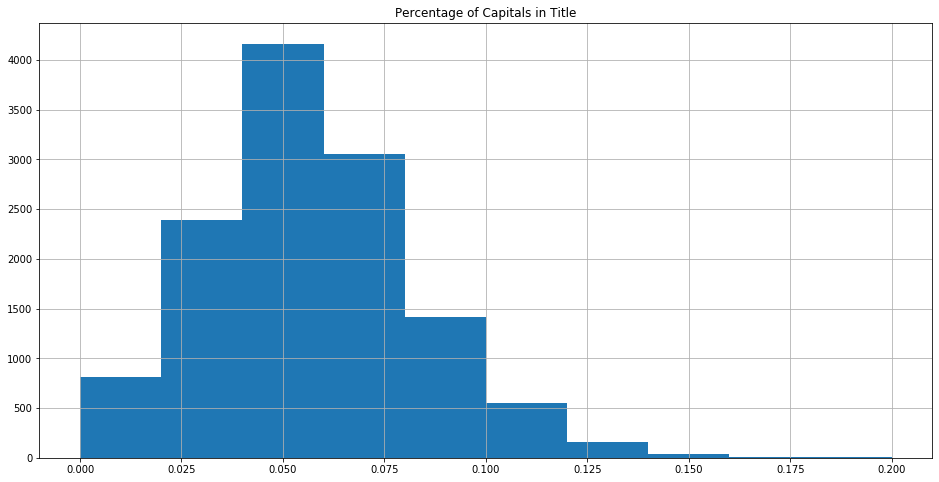

In [20]:
show_hist_for_col(df_clean, 'norm_caps_in_title', 'Percentage of Capitals in Title')

The percentage of capitals in the titles here do overlap with the true stories from the original dataset, but that does not mean that the heuristic would generalize.

In [21]:
# remove the columns relating to the number of capitals in the title
df_clean.drop(['caps_in_title', 'title_len', 'norm_caps_in_title'], axis=1, inplace=True)

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Tokenize and Normalize Title and Text

In [22]:
df_clean['tt_tokens'] = df_clean.apply(lambda row: model_helper_functions.tokenize_and_normalize_title_and_text(row['webTitle'],
                                                                                          row['fields.bodyText']), axis=1)

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_clean.head()

,fields.bodyText,webTitle,tt_tokens
5050,Theresa May has used her new year message to r...,Theresa May’s new year message: I’ll fight re...,"[theresa, new, year, message, i, ll, fight, re..."
5051,After a year of seismic shocks comes the prote...,Donald Trump victory sparks global women’s rig...,"[donald, trump, victory, sparks, global, women..."
5052,"I am full of admiration for Phil Scraton, who ...",Family chords and discord | Brief letters,"[family, chords, and, discord, brief, letters,..."
5053,The Tory chairman of the Commons foreign affai...,Tory MP Crispin Blunt questions PM's criticism...,"[tory, MP, crispin, blunt, questions, pm, crit..."
5054,Politician of the year – Nigel Farage We weren...,Man of 2016? Nigel Farage – my alternative New...,"[man, of, nigel, farage, my, alternative, new,..."


# Save Data

In [24]:
if SAVE_FILE:
    df_clean.to_csv(DATA_PATH + CLEAN_DATA_FILE_NAME, index=False)